C:\Users\WSN-LINK\Anaconda3\lib\site-packages\ipykernel_launcher.py:607: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


              precision    recall  f1-score   support

           0       0.80      0.78      0.79     20983
           1       0.77      0.81      0.79     21084
           2       1.00      0.98      0.99     21214

   micro avg       0.86      0.86      0.86     63281
   macro avg       0.86      0.85      0.86     63281
weighted avg       0.86      0.86      0.86     63281

[[16285  4698     0]
 [ 3969 17115     0]
 [    0   507 20707]]
densify:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Normalized confusion matrix


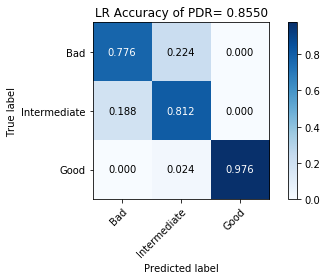

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.dates as md
import xgboost
from sklearn import datasets, linear_model, svm
from statsmodels.formula.api import ols
from patsy.highlevel import dmatrices
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import scale
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from sklearn import metrics
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_rows=10
from datetime import datetime
import numpy as np
df = pd.read_table("grenoble_7.k7",sep = ',',header = 0)

class_names=['Bad','Intermediate','Good']
classifier=svm.SVC(kernel='linear',C=0.01)

correlations = df['mean_rssi'][0:].astype('float64').corr(df['pdr'][0:].astype('float64'))
#print(correlations)

#plt.matshow(df.corr())
#plt.show()


def linear_regression_rssi_pdr():
    y, X = dmatrices('mean_rssi ~ pdr', data=df, return_type='dataframe')
    #print(X)
    mod = sm.OLS(y, X)

    res = mod.fit()
    sm.stats.linear_rainbow(res)
    sm.graphics.plot_fit(res, "pdr")

    plt.savefig("Linear_Regression_RSSI_PDR.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

def rssi_by_pdr(rssi,pdr):
    plt.plot(df[rssi], df[pdr])
    #plt.plot(df['pdr'], df['mean_rssi'])

    #df=df[["mean_rssi","pdr"]].groupby("pdr", as_index=True)
    #df=df[["mean_rssi","pdr"]].groupby("mean_rssi", as_index=True)

    #print(df)
    #plt.xlim(0, 1)  # decreasing time
    plt.xlim(-100, 0)  # decreasing time
    plt.ylim(0, 1)
    #plt.ylim(-100, 0)

    #plt.xlabel('PDR')
    plt.xlabel('MEAN RSSI')
    #plt.ylabel('MEAN RSSI')
    plt.ylabel('PDR')
    plt.title('Evolution of RSSI over PDR')
    plt.grid(True)

    #plt.show()
    plt.savefig("RSSI_BY_PDR.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.savefig("PDR_BY_RSSI.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

def correlation_rssi_pdr():
    correlations = df['mean_rssi'][0:].astype('float64').corr(df['pdr'][0:].astype('float64'))
    print(correlations)
    y, X = dmatrices('mean_rssi ~ pdr', data=df, return_type='dataframe')

    mod = sm.OLS(y, X)
    model = mod.fit()

    plt.plot(X,y, 'ro')
    plt.plot(X, model.fittedvalues, 'b')
    plt.ylim(-100,0)
    plt.xlim(0,1)
    #plt.hist(model.resid_pearson)

    plt.xlabel('PDR (%)')
    plt.ylabel('Average RSSI (in dBm)')
    plt.title('Linear regression')

    plt.savefig("Correlation_RSSI_PDR.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def LinearRegression_rssi_pdr():
    correlations = df['mean_rssi'][0:].astype('float64').corr(df['pdr'][0:].astype('float64'))
    print(correlations)
    y, X = dmatrices('mean_rssi ~ pdr', data=df, return_type='dataframe')

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99999, random_state=0, shuffle=False)
    clf = LinearRegression(normalize=True)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    print("R2 Score===>: ",r2_score(y,y_pred))
    
def mean_pdr_per_channel():
    dep = df[["channel","pdr"]].groupby("channel", as_index=True).mean()
    ax = dep.plot(kind = "bar", figsize=(10,5))
    ax.set_xlabel("IEEE802.15.4 Channel", fontsize=12)
    ax.set_xlabel("PDR", fontsize=12)
    ax.set_title("PDR per channel", fontsize=16)
    ax.legend().set_visible(False)  # on supprime la légende
    plt.ylim([0, 1])
    plt.grid(True)

    plt.savefig("Mean_PDR_PerChannel_Grenoble7.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def mean_rssi_per_channel():
    dep = df[["channel","mean_rssi"]].groupby("channel", as_index=True).mean()
    ax = dep.plot(kind = "bar", figsize=(10,5))
    ax.set_xlabel("IEEE802.15.4 Channel", fontsize=12)
    ax.set_ylabel("Average RSSI",fontsize=12)
    ax.set_title("Average RSSI per channel", fontsize=16)
    ax.legend().set_visible(False)  # on supprime la légende
    plt.ylim([-100, 0])
    plt.grid(True)

    plt.savefig("Mean_RSSI_PerChannel_Grenoble7.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

def pdr_time_per_channel(df):
    df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
    df=df.set_index('datetime')
    plt.rcParams.update({'font.size': 14})
    color_list = ["blue", "red"]
    #for link, df_link in df.groupby(["src"]):
    #df.groupby(["src"])
    
    for link, df_link in df.groupby(["src"]):
        #dep = df_link[["channel","pdr"]].groupby("datetime", as_index=True).mean()
        #dep = df_link[["channel","mean_rssi"]].groupby("datetime", as_index=True).mean()
        #print(dep)
        for ln,ln1 in df_link.groupby("channel"):
            #print(ln1)
            plt.plot(ln1.index, 0.95*ln1.mean_rssi / 100 + ln,
            #plt.plot(ln1.index, 0.95 * ln1.pdr + ln,
                          '-', zorder=2, markersize=2,
                          color=color_list[ln%len(color_list)])
        #print(ln1.channel)
        day1_start = pd.to_datetime("2018-01-11 22:00:00.000")
        day1_stop = pd.to_datetime("2018-01-12 06:00:00.000")
        plt.fill_between([day1_start, day1_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        day2_start = pd.to_datetime("2018-01-12 22:00:00.000")
        day2_stop = pd.to_datetime("2018-01-13 06:00:00.000")
        plt.fill_between([day2_start, day2_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        #day3_start = pd.to_datetime("2018-01-13 20:00:00.000")
        #day3_stop = pd.to_datetime("2018-01-13 06:00:00.000")
        #plt.fill_between([day3_start, day3_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        plt.xlabel('Time')
        #plt.ylabel('PDR (%) per IEEE802.15.4 Channel')
        plt.ylabel('Average RSSI (dBm) per IEEE802.15.4 Channel')
        plt.ylim([10, 27])
        plt.yticks(df.channel.unique())
        #plt.xticks(df.index.unique())
        plt.grid(True)
        #xfmt = md.DateFormatter('%H:%M:%s')
        #xfmt = md.DateFormatter('%M:%S')
        xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(xfmt)
        plt.gcf().autofmt_xdate()

        #plt.savefig("time_pdr\pdr_time_per_channel_{0}.png".format(link), format='png', bbox_inches='tight', pad_inches=0)
        plt.savefig("rssi_time_per_channel_{0}.png".format(link), format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()

def rssi_or_pdr_per_channel(df):
    df.hist(column='pdr',by='channel')
    plt.savefig("pdr_per_channel.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    df.hist(column='mean_rssi',by='channel')
    plt.savefig("rssi_per_channel.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

#Function to plot the confusion matrice

def trace_conf_mat(cm, acc,classes, norm, title,cmap=plt.cm.Blues):
    accuracy=acc
    
    classes = ['Bad','Intermediate','Good']
    if norm:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title+'%.4f' % accuracy,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.3f' if norm else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#La fonction val_prediction à pour objectif de fournir une prédiction des valeurs en entrée. Cette prédiction aidera notamment dans la construction de la matrice de confusion

def val_prediction_pdr(df):
    ret=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.02:
            ret.append(0.5)
        elif df['pdr'][i] >= 0.02 and df['pdr'][i] < 0.25:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.25 and df['pdr'][i] < 0.3:
            ret.append(0.9)
        elif df['pdr'][i] >= 0.3 and df['pdr'][i] <= 0.35:
            ret.append(0.1)
        elif df['pdr'][i] > 0.35 and df['pdr'][i] <= 0.73:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.73 and df['pdr'][i] <= 0.75:
            ret.append(0.9)
        elif df['pdr'][i] > 0.75 and df['pdr'][i] <= 0.8:
            ret.append(0.1)
        elif df['pdr'][i] > 0.8 and df['pdr'][i] < 0.85:
            ret.append(0.5)
        else:
            ret.append(df['pdr'][i])
    return ret


def conf_matrix_pdr(df):
    y_true=list()
    y_pred=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            y_true.append('Bad')
        elif df['pdr'][i] > 0.75:
            y_true.append('Good')
        else:
            y_true.append('Intermediate')
        
        if val_pred[i] < 0.3:
            y_pred.append('Bad')
        elif val_pred[i] > 0.75:
            y_pred.append('Good')
        else:
            y_pred.append('Intermediate')
    #print (y_true)
    #print(y_pred)
    return confusion_matrix(y_true,y_pred)



def plot_confusion_matrix_pdr(df, classes, normalize=False, title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    y_true=list()
    y_pred=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            y_true.append('Bad')
        elif df['pdr'][i] > 0.75:
            y_true.append('Good')
        else:
            y_true.append('Intermediate')
        
        if val_pred[i] < 0.3:
            y_pred.append('Bad')
        elif val_pred[i] > 0.75:
            y_pred.append('Good')
        else:
            y_pred.append('Intermediate')
    cm=confusion_matrix(y_true,y_pred)
    t=cm[0][0]+cm[1][1]+cm[2][2]
    accuracy=t/len(df)
    trace_conf_mat(cm, accuracy,classes, normalize, title,cmap=plt.cm.Blues)
np.set_printoptions(precision=2)


def mse_rsquare(df):
    d= val_prediction_pdr(df)
    r2 = r2_score( df["pdr"], d)
    mse=mean_squared_error( df["pdr"], d)
    rmse = np.sqrt(mse)  
    print('Values for PDR:\n')
    print('R-Square is: ',r2,'\n')
    print('MSE is: ',mse,'\n')
    print('RMSE is: ',rmse)    
    
    print('Values for AVERAGE RSSI:\n')
    
    d1= val_prediction_rssi(df)
    r21 = r2_score( df["mean_rssi"], d1)
    mse1=mean_squared_error( df["mean_rssi"], d1)
    rmse1 = np.sqrt(mse1)  
   
    print('R-Square is: ',r21,'\n')
    print('MSE is: ',mse1,'\n')
    print('RMSE is: ',rmse1)   
    

def val_prediction_rssi(df):
    ret=list()
    for i in range(len(df)):
        if df['mean_rssi'][i] < -89:
            ret.append(-50)
        elif df['mean_rssi'][i] >= -89 and df['mean_rssi'][i] <= -75:
            ret.append(df['mean_rssi'][i])
        elif df['mean_rssi'][i] > -75 and df['mean_rssi'][i] < -70:
            ret.append(-30)
        elif df['mean_rssi'][i] >= -70 and df['mean_rssi'][i] < -69:
            ret.append(-75)
        elif df['mean_rssi'][i] >= -69 and df['mean_rssi'][i] <= -42:
             ret.append(df['mean_rssi'][i])
        elif df['mean_rssi'][i] > -42 and df['mean_rssi'][i] <= -40:
             ret.append(-30)
        elif df['mean_rssi'][i] > -40 and df['mean_rssi'][i] <= -35:
             ret.append(-75)
        elif df['mean_rssi'][i] >=-30 and df['mean_rssi'][i] <= -26:
             ret.append(df['mean_rssi'][i])
        else:
            ret.append(-50)
    return ret

def conf_matrix_rssi(df):
    y_true=list()
    y_pred=list()
    val_pred=val_prediction_rssi(df)
    for i in range(len(df)):
        if df['mean_rssi'][i] < -70:
            y_true.append('Bad')
        elif df['mean_rssi'][i] > -40:
            y_true.append('Good')
        else:
            y_true.append('Intermediate')
        
        if val_pred[i] < -70:
            y_pred.append('Bad')
        elif val_pred[i] > -40:
            y_pred.append('Good')
        else:
            y_pred.append('Intermediate')
    #print (y_true)
    #print(y_pred)
    conf=confusion_matrix(y_true,y_pred)
    t=conf[0][0]+conf[1][1]+conf[2][2]
    accuracy=t/len(df)
    
    #print('accuracy of average RSSI= ', accuracy)
    return conf


def trace_confusion_matrix():
    plot_confusion_matrix_pdr(df, classes=class_names, title='Accuracy of PDR= ')
    plt.savefig("ConfusionMatrixWithoutNormalizationPDR.png", format='png', bbox_inches='tight', pad_inches=0)

    plot_confusion_matrix_pdr(df, classes=class_names, normalize=True,title='Accuracy of PDR= ')
    plt.savefig("NormalizedConfusionMatrixPDR.png", format='png', bbox_inches='tight', pad_inches=0)
    
    plot_confusion_matrix_rssi(df, classes=class_names, title='Accuracy of Average RSSI= ')
    plt.savefig("ConfusionMatrixWithoutNormalizationRSSI.png", format='png', bbox_inches='tight', pad_inches=0)

    plot_confusion_matrix_rssi(df, classes=class_names, normalize=True,title='Accuracy of Average RSSI= ')
    plt.savefig("NormalizedConfusionMatrixRSSI.png", format='png', bbox_inches='tight', pad_inches=0)
    
    logistic_regression(df, classes=class_names, title='LR Accuracy of PDR= ') 
    plt.savefig("LRConfusionMatrixWithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)
    
    logistic_regression(df, classes=class_names, normalize=True,title='LR Accuracy of PDR= ')
    plt.savefig("LRConfusionMatrixWithoutNormalizationPDR.png", format='png', bbox_inches='tight', pad_inches=0)
    
    linear_SVM(df, classes=class_names, title='SVM Accuracy of PDR= ') 
    plt.savefig("SVMConfusionMatrixWithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)
    
    linear_SVM(df, classes=class_names, normalize=True,title='SVM Accuracy of PDR= ')
    plt.savefig("SVMConfusionMatrixWithoutNormalizationPDR.png", format='png', bbox_inches='tight', pad_inches=0)
    
    random_forest(df, classes=class_names, title='RF Accuracy of PDR= ') 
    plt.savefig("RF_CM_WithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)
    
   
    random_forest(df, classes=class_names, normalize=True,title='RF Accuracy of PDR= ')
    plt.savefig("RF_CM_WithoutNormalizationPDR.png", format='png', bbox_inches='tight', pad_inches=0)
    
def classes_plot(df):
    target=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append("Bad")
        elif df['pdr'][i] > 0.75:
            target.append("Good")
        else:
            target.append("Intermediate")
    df['target']=target
    target_count=df.target.value_counts()
    print('target_count: ', target_count)
    target_count.plot(kind='bar', title='Count (PDR)', figsize=(10,6))
    plt.ylim([0, 90000])
    plt.grid(True)
    plt.savefig("conf_mat\Initial_bar_char.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

def ros_pdr(df):
    ros = RandomOverSampler(random_state=0)
    
    target=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append("Bad")
        elif df['pdr'][i] > 0.75:
            target.append("Good")
        else:
            target.append("Intermediate")
    df['target']=target
    target_count=df.target.value_counts()
    print('target_count: ', target_count)
    
    labels=df.columns[7:]
    X=df[labels]
    y=df['target']      
            
    X_resampled, y_resampled = ros.fit_resample(X, y)
    from collections import Counter
    #print(sorted(Counter(y_resampled).items()))
    bad=0
    intermediate=0
    good=0
    for i in range(len(y_resampled)):
        if y_resampled[i]== 'Bad':
            bad=bad+1
        elif y_resampled[i]== 'Intermediate':
            intermediate=intermediate+1
        else:
            good=good+1
    
    df=pd.DataFrame({'Classes':['Bad','Good','Intermediate'],'Random Over Sampling (ROS) of PDR':[bad,good,intermediate]})
    ax = df.plot.bar(x='Classes', y='Random Over Sampling (ROS) of PDR', figsize=(10,5))
    ax.set_xlabel("Classes", fontsize=12)
    ax.set_title("Random Over Sampling (ROS) of PDR", fontsize=16)
    ax.legend().set_visible(False)
    plt.ylim([0, 90000])
    plt.grid(True)
    plt.savefig("conf_mat\ROS_bar_char.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()



def rus_pdr(df):
    ros = RandomOverSampler(random_state=0)
    
    target=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append("Bad")
        elif df['pdr'][i] > 0.75:
            target.append("Good")
        else:
            target.append("Intermediate")
    df['target']=target
    target_count=df.target.value_counts()
    print('target_count: ', target_count)
    
    labels=df.columns[7:]
    X=df[labels]
    y=df['target']      
    print('X:  =====================>: ',X)        
    print('X:  =====================>: ',y)  
    from collections import Counter
    
    X_resampled, y_resampled = ros.fit_resample(X, y)
    print(sorted(Counter(y_resampled).items()))
    #print(y_resampled)
    bad=0
    intermediate=0
    good=0
    for i in range(len(y_resampled)):
        if y_resampled[i]== 'Bad':
            bad=bad+1
        elif y_resampled[i]== 'Intermediate':
            intermediate=intermediate+1
        else:
            good=good+1
    
    df=pd.DataFrame({'Classes':['Bad','Good','Intermediate'],'Random Under Sampling (RUS) of PDR':[bad,good,intermediate]})
    ax = df.plot.bar(x='Classes', y='Random Under Sampling (RUS) of PDR', figsize=(10,5))
    ax.set_xlabel("Classes", fontsize=12)
    ax.set_title("Random Under Sampling (RUS) of PDR", fontsize=16)
    ax.legend().set_visible(False)
    plt.ylim([0, 90000])
    plt.grid(True)
    plt.savefig("conf_mat\RUS_bar_char.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
   
    
def run_rus_ros_pdr(df):
    rus_pdr(df)
    ros_pdr(df)

    
def linear_SVM(df, classes, normalize=False, title=None,cmap=plt.cm.Blues):
    ros = RandomOverSampler(random_state=0)
    rus = RandomUnderSampler(random_state=0)
    y_true=list()
    y_pred=list()
    target=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
        elif df['pdr'][i] > 0.75:
            target.append(2)
        else:
            target.append(1)
        
        if val_pred[i] < 0.3:
            y_pred.append(0)
        elif val_pred[i] > 0.75:
            y_pred.append(2)
        else:
            y_pred.append(1)
    df['target']=target
    df['pred']=y_pred
    mydata=df.ix[:,(5,7)].values#Column 5 corresponds to the value of PDR and column 7 to the value representing that valu in class(BadnGood and Intermediate)
    X=scale(mydata)
    y=df['pred']  
            
    X_resampled, y_resampled = ros.fit_resample(X, y)
    #X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf = LinearSVC(random_state=0, tol=1e-5)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    print('y_test',y_test)
    print('y_pred',y_pred)
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    #Plotting of Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy=clf.score(X_test,y_pred)
    
    trace_conf_mat(cm, accuracy,classes, normalize, title,cmap=plt.cm.Blues)
np.set_printoptions(precision=2)    
    
def logistic_regression(df, classes, normalize=False, title=None,cmap=plt.cm.Blues):
    ros = RandomOverSampler(random_state=0)
    rus = RandomUnderSampler(random_state=0)
    y_true=list()
    y_pred=list()
    target=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
        elif df['pdr'][i] > 0.75:
            target.append(2)
        else:
            target.append(1)
        
        if val_pred[i] < 0.3:
            y_pred.append(0)
        elif val_pred[i] > 0.75:
            y_pred.append(2)
        else:
            y_pred.append(1)
    df['target']=target
    df['pred']=y_pred
    mydata=df.ix[:,(5,7)].values#Column 5 corresponds to the value of PDR and column 7 to the value representing that valu in class(BadnGood and Intermediate)
    X=scale(mydata)
    y=df['pred']
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    #Plotting of Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("densify: ",logreg.densify())
    accuracy=logreg.score(X_test, y_test)
    
    trace_conf_mat(cm, accuracy,classes, normalize, title,cmap=plt.cm.Blues)
np.set_printoptions(precision=2)



def random_forest(df, classes, normalize=False, title=None,cmap=plt.cm.Blues):
    ros = RandomOverSampler(random_state=0)
    rus = RandomUnderSampler(random_state=0)
    y_true=list()
    y_pred=list()
    target=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
        elif df['pdr'][i] > 0.75:
            target.append(2)
        else:
            target.append(1)
        
        if val_pred[i] < 0.3:
            y_pred.append(0)
        elif val_pred[i] > 0.75:
            y_pred.append(2)
        else:
            y_pred.append(1)
    df['target']=target
    df['pred']=y_pred
    mydata=df.ix[:,(5,7)].values#Column 5 corresponds to the value of PDR and column 7 to the value representing that valu in class(BadnGood and Intermediate)
    X=scale(mydata)
    y=df['pred']
    X_resampled, y_resampled = rus.fit_resample(X, y)
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    
    clf.fit(X,y)
    print (clf.score(X,y))
    y_pred=clf.predict(X)
    from sklearn.metrics import classification_report
    print(classification_report(y,y_pred))
    
    #X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.99, random_state=None,shuffle=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=0)
    CLF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    CLF.fit(X_test, y_test)
    
    y_pred = CLF.predict(X_test)
    
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    #Plotting of Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
   
    accuracy=CLF.score(X_test, y_test)
    
    trace_conf_mat(cm, accuracy,classes, normalize, title,cmap=plt.cm.Blues)
np.set_printoptions(precision=2)



#logistic_regression(df, classes=class_names, title='LR Accuracy of PDR= ') 
#plt.savefig("PDR\\1LRConfusionMatrixWithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)

logistic_regression(df, classes=class_names, normalize=True,title='LR Accuracy of PDR= ')
plt.savefig("LRConfusionMatrixNormalizedPDR.png", format='png', bbox_inches='tight', pad_inches=0)
    

    
#linear_SVM(df, classes=class_names, title='SVM Accuracy of PDR= ') 
#plt.savefig("SVMConfusionMatrixWithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)

#linear_SVM(df, classes=class_names, normalize=True,title='SVM Accuracy of PDR= ')
#plt.savefig("SVMConfusionMatrixWithoutNormalizationPDR.png", format='png', bbox_inches='tight', pad_inches=0)
#LinearRegression_rssi_pdr()
#linear_SVM(df)    
#rus_pdr(df)    
#test(df)  
#run_rus_ros_pdr(df)
#classes_plot(df)    
#trace_confusion_matrix()
#print(conf_matrix_pdr(df))
#print(conf_matrix_rssi(df))
#print(val_prediction_pdr(df))    
#test(df)
#mse_rsquare(df)
#mean_rssi_per_channel()    
#rssi_or_pdr_per_channel(df)

#pdr_time_per_channel(df)    
#mean_pdr_per_channel()    
#correlation_rssi_pdr()    
#rssi_by_pdr("mean_rssi","pdr")    
#linear_regression_rssi_pdr()
#mat= numpy.corrcoef(df['mean_rssi'],df['pdr'])
#print(mat)